In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [156]:
# Charger le dataset depuis le fichier Excel
file_path = 'dataset.xlsx'
data = pd.read_excel(file_path)
#data.head()
# Afficher les premières lignes du dataset


In [157]:
df = data.copy()

In [158]:
df.shape #visualiser la taille de la matrice 

(5644, 111)

In [159]:
df.dtypes.value_counts() #comter_le_nombre_de_type_de_variable

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: >

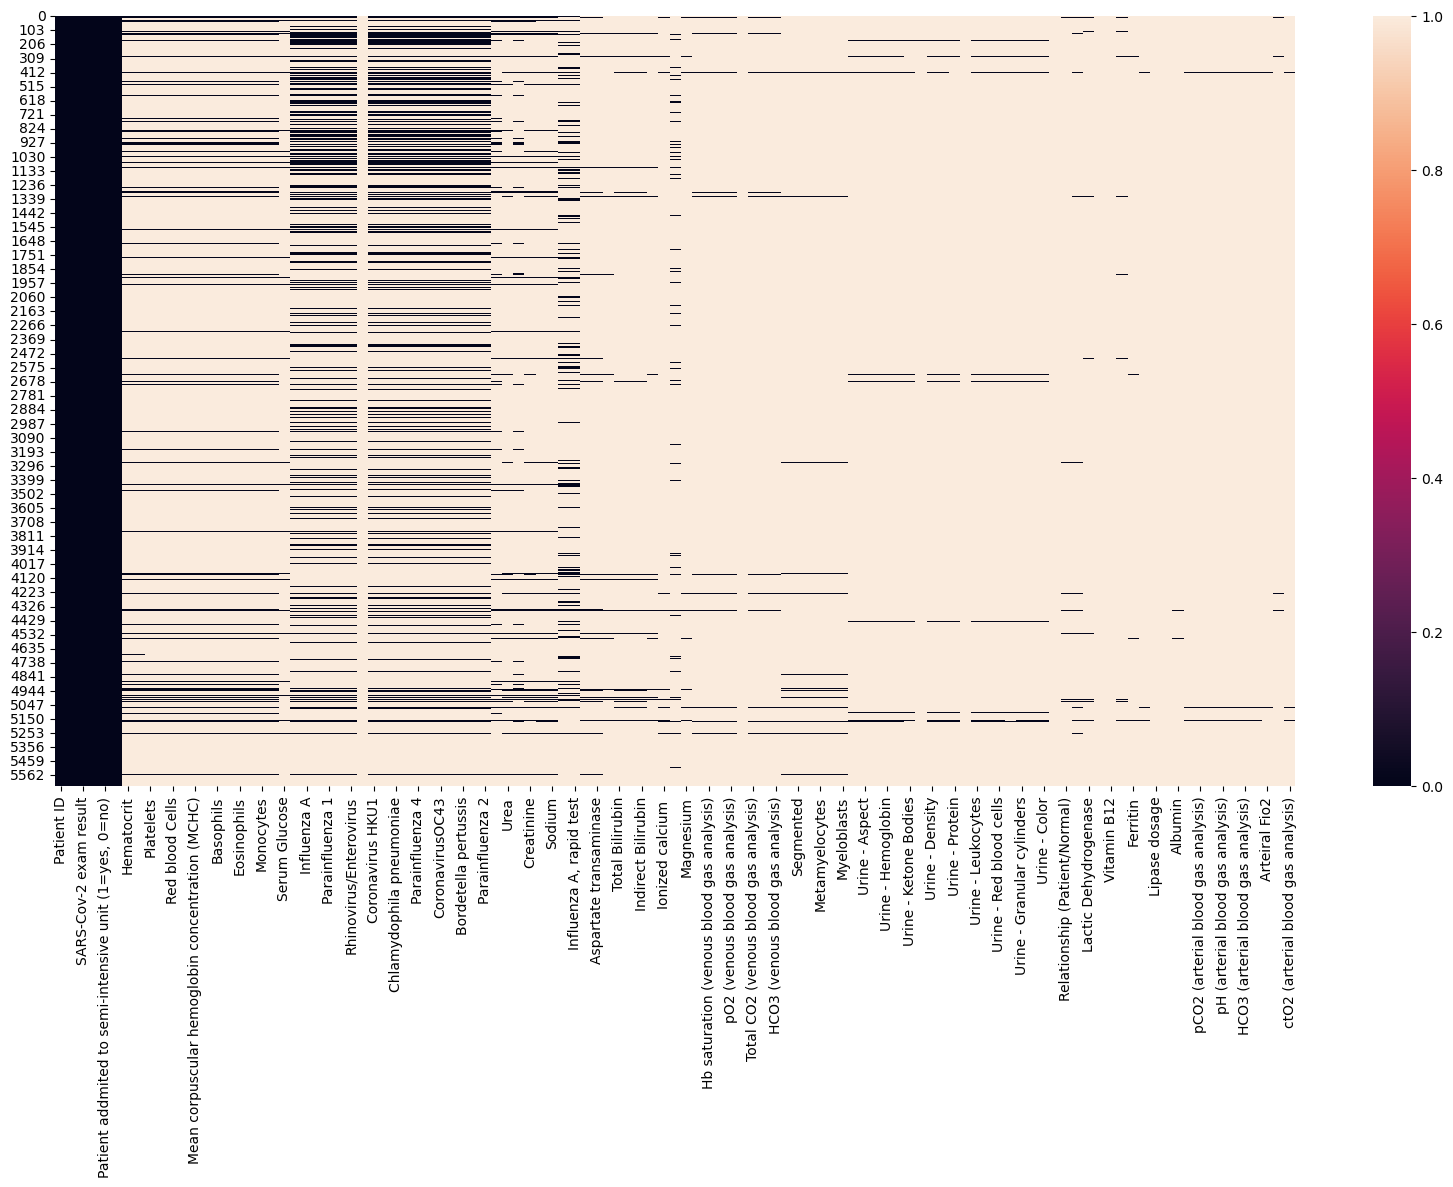

In [160]:
#affiche_valeur_maquante_sous_forme_image
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [161]:
#pourcentage_des_valeurs_manquantes_
df.isna().sum()/111

Patient ID                                                0.000000
Patient age quantile                                      0.000000
SARS-Cov-2 exam result                                    0.000000
Patient addmited to regular ward (1=yes, 0=no)            0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)     0.000000
                                                           ...    
HCO3 (arterial blood gas analysis)                       50.603604
pO2 (arterial blood gas analysis)                        50.603604
Arteiral Fio2                                            50.666667
Phosphor                                                 50.666667
ctO2 (arterial blood gas analysis)                       50.603604
Length: 111, dtype: float64

In [162]:
df.columns[df.isna().sum()/111 < 0.9] #selectionner tous les colonnes dont les valeur manquante est > a 90

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)'],
      dtype='object')

In [163]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

In [164]:
df.shape

(5644, 39)

In [165]:
df = df

In [166]:
df['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    5086
positive     558
Name: count, dtype: int64

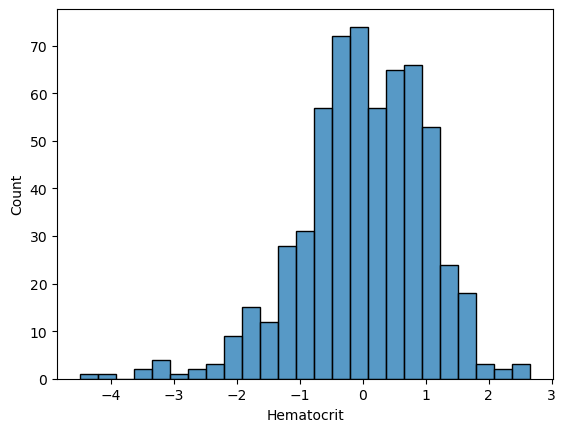

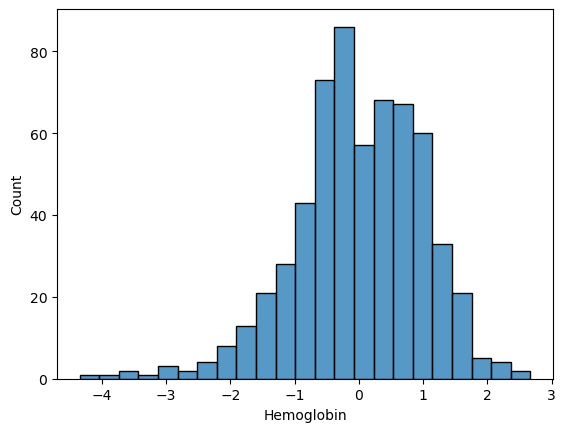

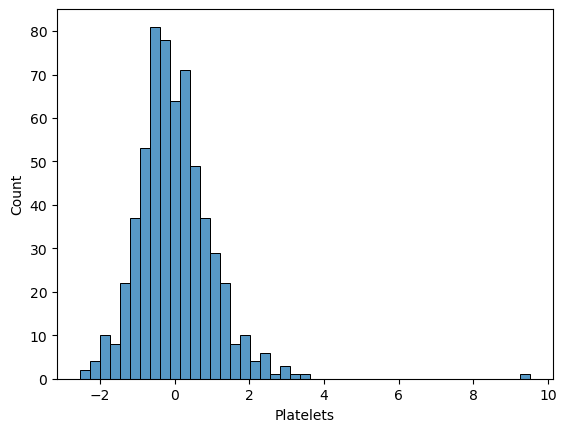

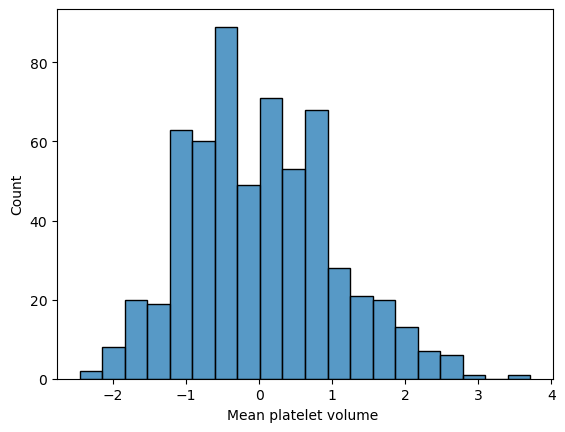

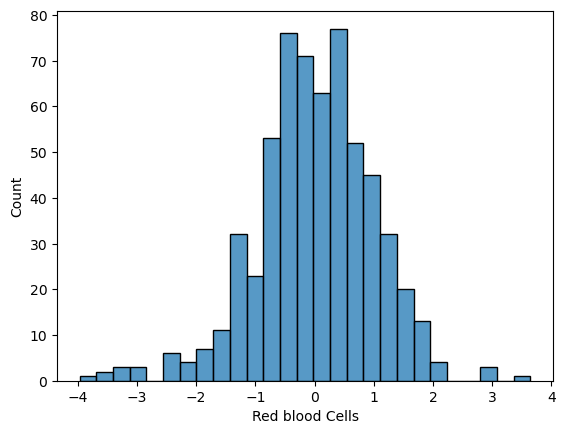

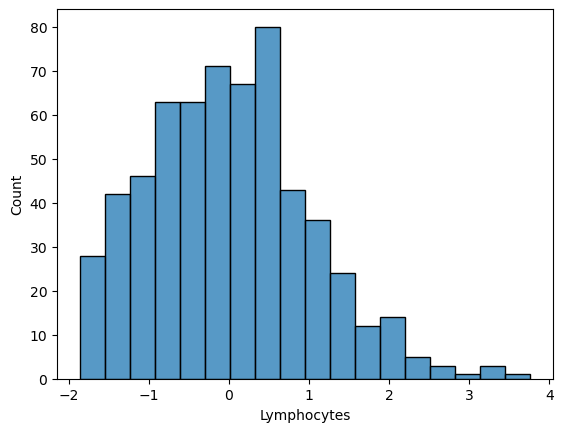

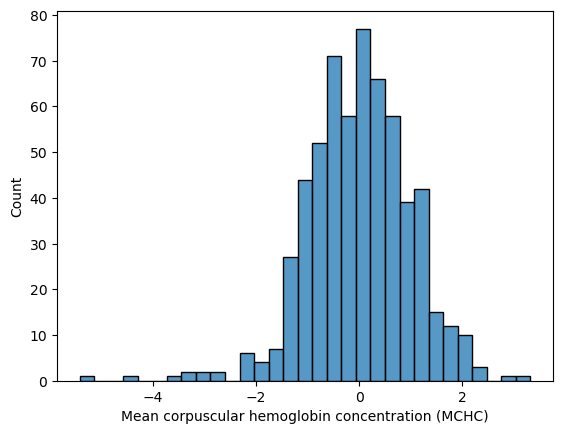

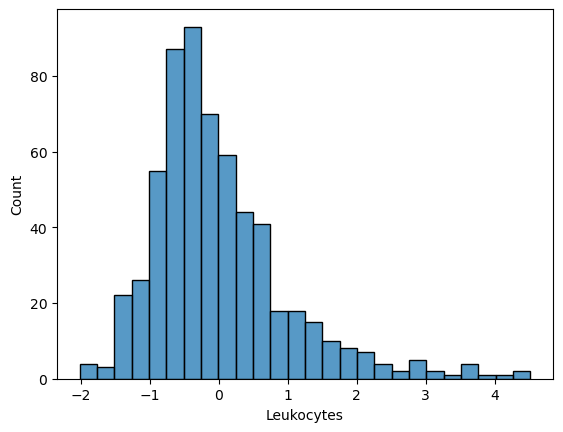

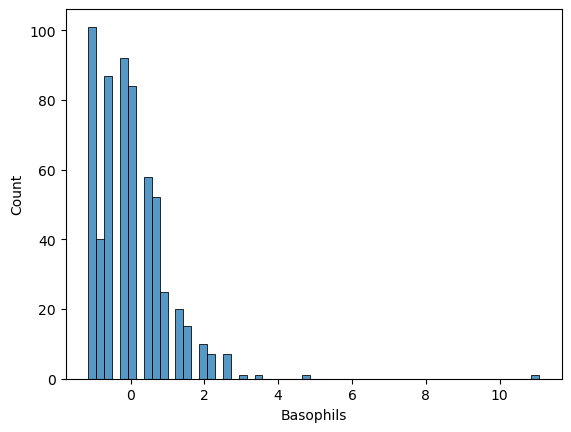

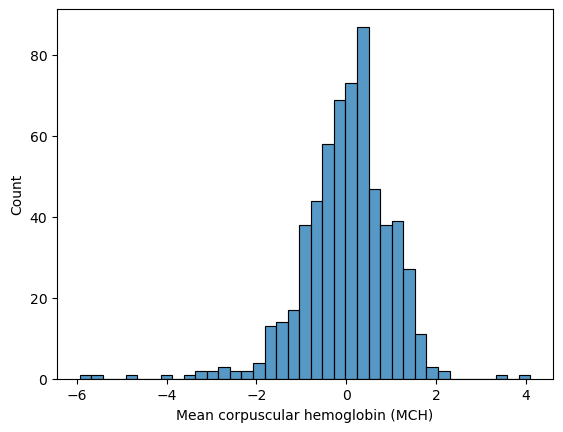

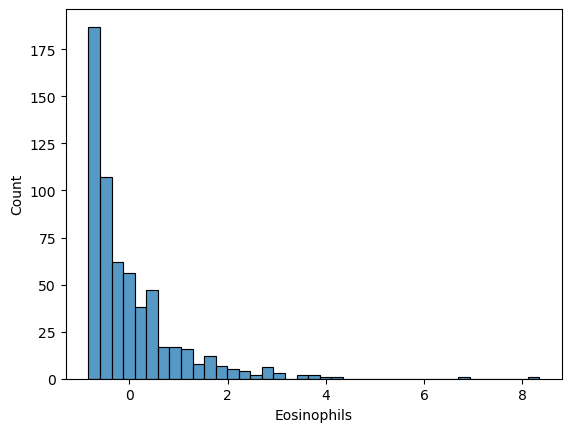

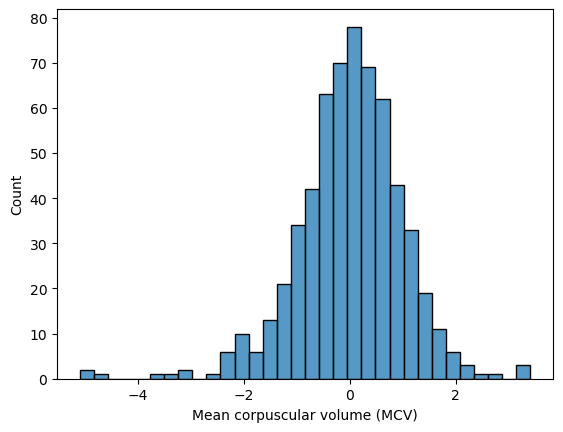

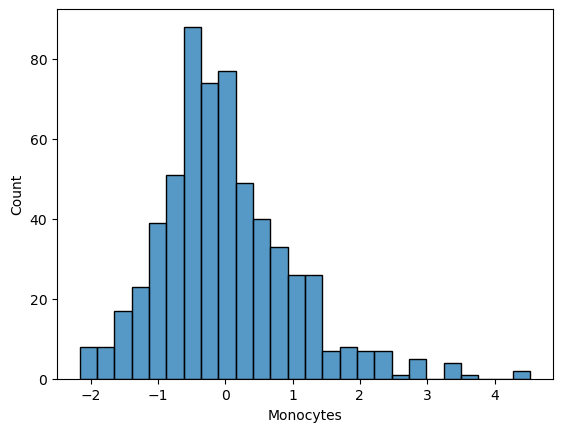

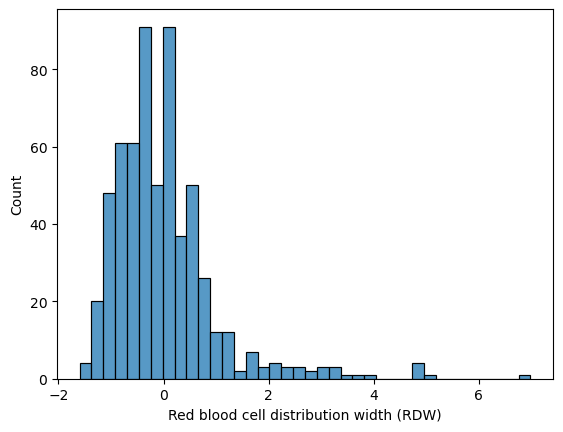

In [167]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot( df[col] )

<Axes: xlabel='Patient age quantile', ylabel='Count'>

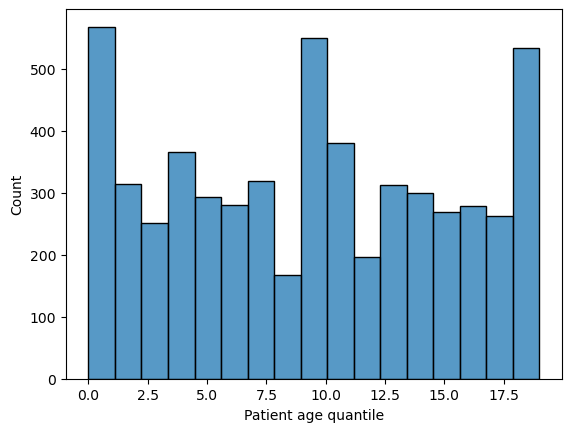

In [168]:
sns.histplot( df['Patient age quantile'] )

In [169]:
#for col in df.select_dtypes('object'):
    #plt.figure()
    #df[col].value_counts().plot.pie()

### Relation Target / Variable 
###### Creation de sous ensemble positif / negatif

In [170]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']

In [171]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

### Creation des ensembles Blood / Vial 

In [172]:

missing_rate = df.isna().sum()/ df.shape[0]
missing_rate # Pourcentage des valeur manquante pour chaque 

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

# Creatiion ensemble Blood / virale 

In [173]:
blood_columns =  df.columns[( missing_rate < 0.9) & ( missing_rate > 0.88)  ]
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [174]:
viral_columns  =  df.columns[( missing_rate < 0.88) & ( missing_rate > 0.75)  ]
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

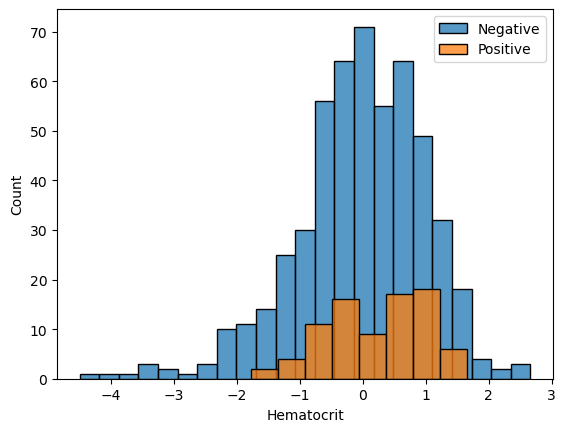

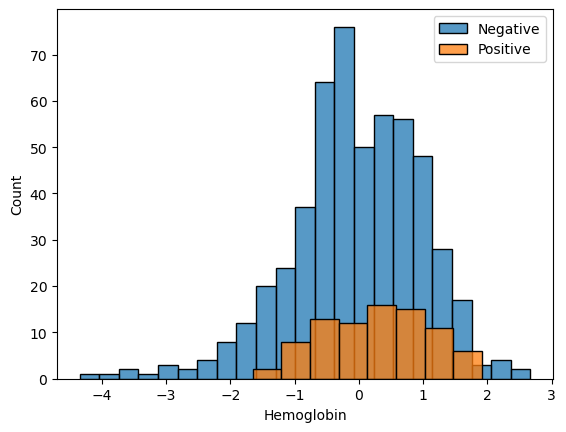

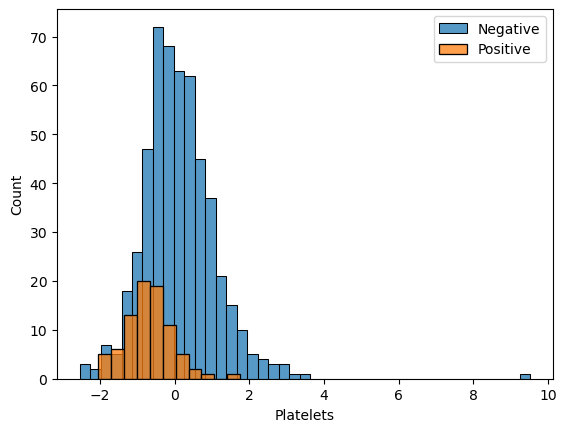

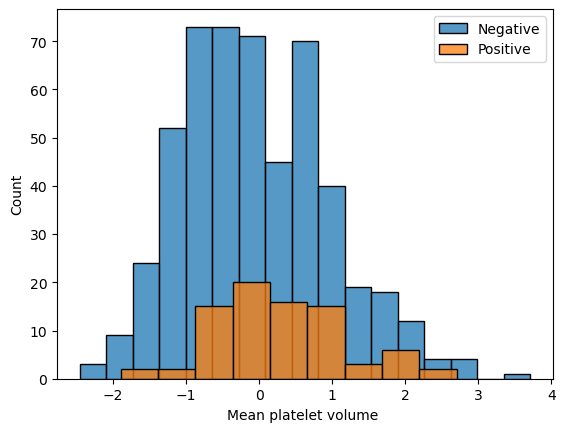

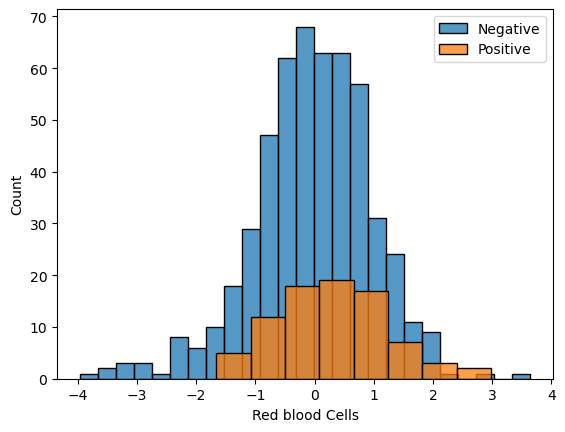

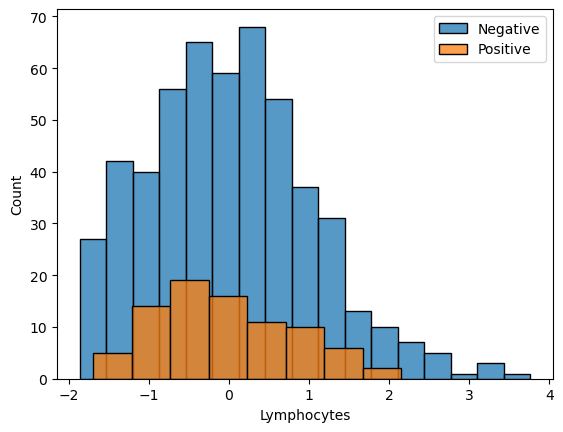

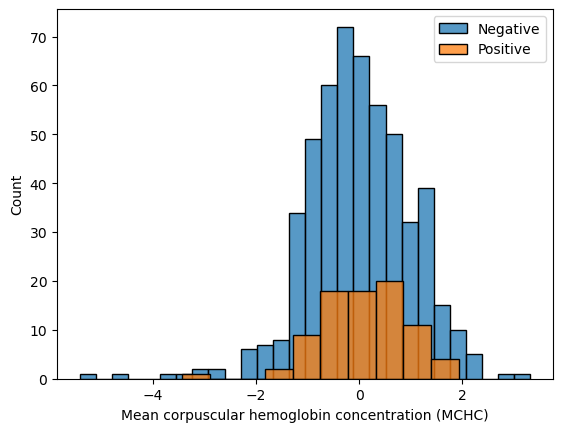

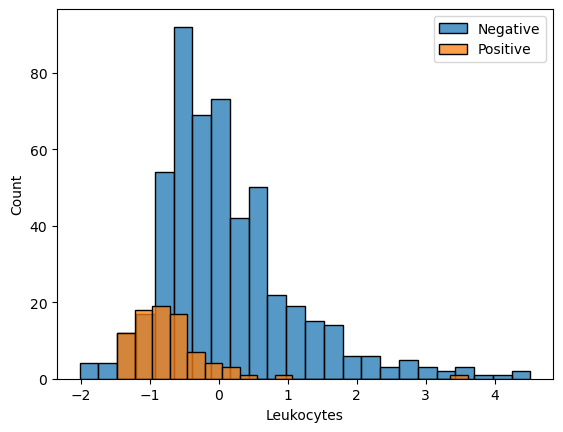

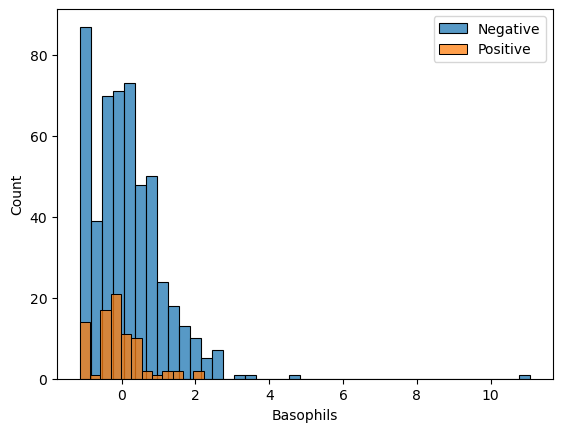

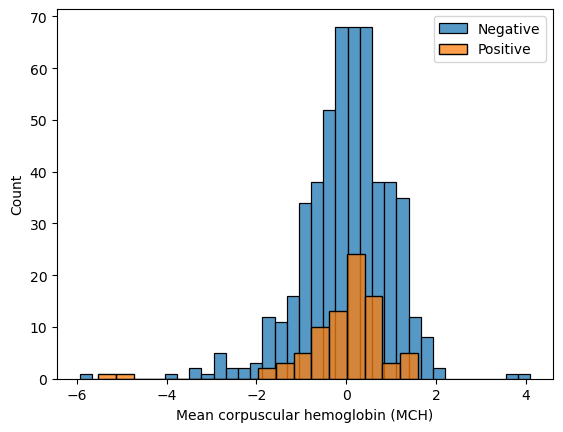

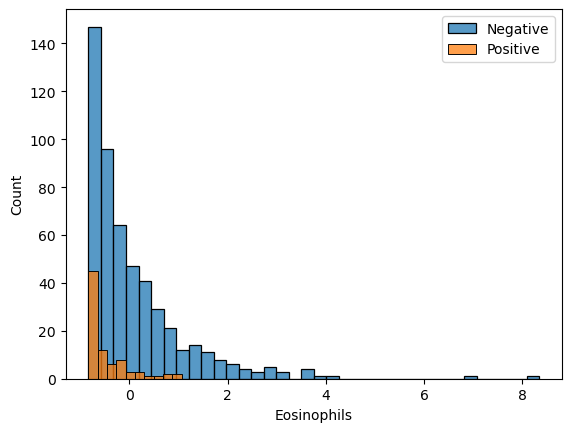

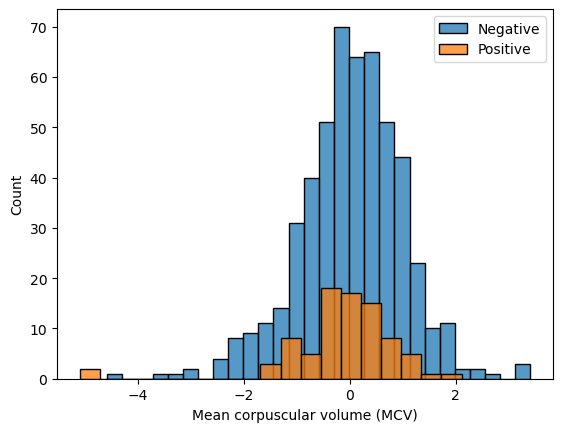

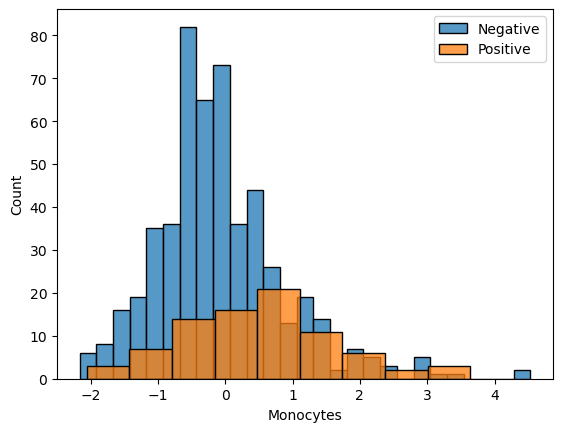

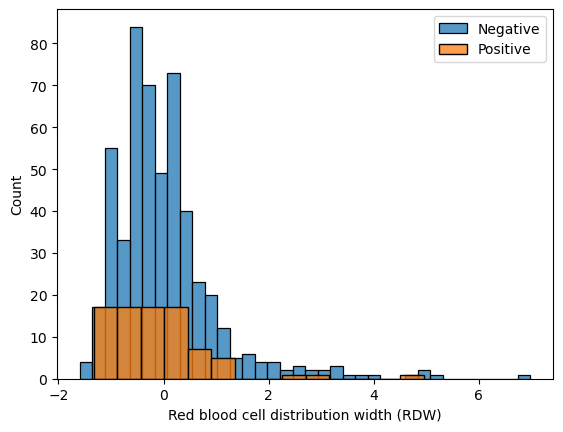

In [175]:
for col in blood_columns:
    plt.figure()
    sns.histplot( negative_df[col] , label='Negative' )
    sns.histplot( positive_df[col] , label='Positive' )
    plt.legend()

# Relation entre Target et Age 

In [176]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'In

<Axes: xlabel='Patient age quantile', ylabel='count'>

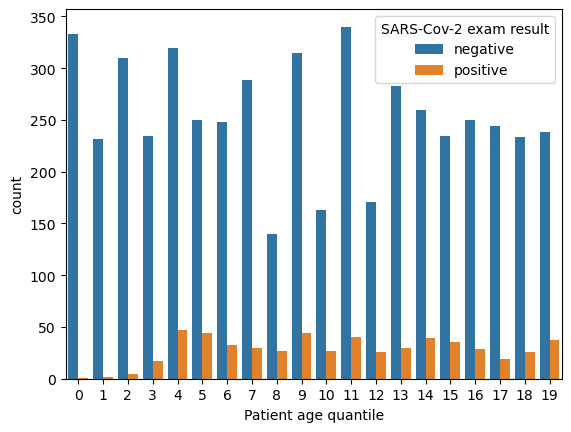

In [177]:

sns.countplot(x ='Patient age quantile' , hue= 'SARS-Cov-2 exam result' , data=df)



## Relation Target / Viral 

In [178]:
pd.crosstab( df['SARS-Cov-2 exam result'] , df['Influenza A'] )

Influenza A,detected,not_detected
SARS-Cov-2 exam result,,
negative,18,1224
positive,0,112


# Relation Variable / Varieble

## relation taux sanguine 

<Axes: >

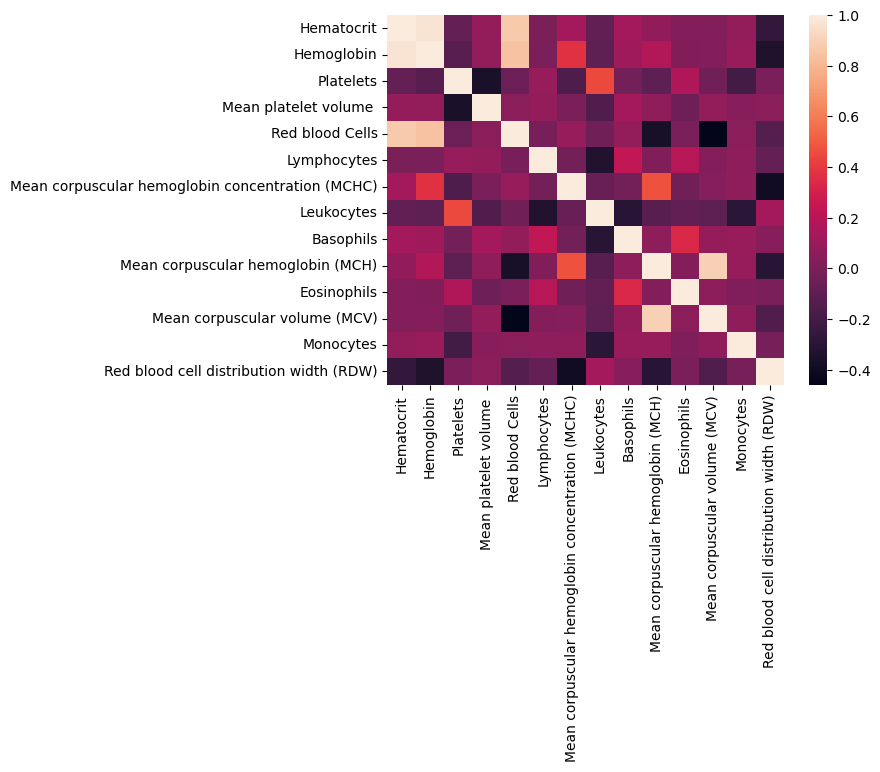

In [179]:
sns.heatmap( df[ blood_columns ].corr() )


# Pre-processing

In [180]:
df = data.copy() # recopie du dataset

In [181]:
df.shape

(5644, 111)

In [189]:
#selection de variable 
missing_rate = df.isna().sum()/ df.shape[0]
#missing_rate # Pourcentage des valeur manquante pour chaque 
viral_columns  =  list(df.columns[( missing_rate < 0.88) & ( missing_rate > 0.75)  ])
blood_columns =  list(df.columns[( missing_rate < 0.9) & ( missing_rate > 0.88)  ])

key_columns = ['Patient age quantile',  'SARS-Cov-2 exam result' ]

In [190]:
df = df[ key_columns + blood_columns + viral_columns ]
df.shape

(5644, 35)

# Netoyage

### Encodage

In [197]:
def Encodage(dataset):
    code = {
        'positive' : 1,
        'negative': 2,
        'detected': 3,
        'not_detected': 4
    }
    for col in dataset.select_dtypes('object'):
        dataset[col] = df[col].map(code)
    return dataset

In [209]:
def imputation(dataset):
    dataset = dataset.dropna(axis=0)
    return dataset


In [210]:
def preprocessing(dataset):
    Encodage(dataset)
    imputation(dataset)
    return dataset

In [211]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,2,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0
2,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN


In [217]:
my_new_data= df.dropna(axis=0)
my_new_data.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
1,17,2,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0
15,9,2,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,1.0
30,9,2,-0.679027,-0.711556,0.952319,-0.886869,-0.321124,-0.875701,-0.253742,-0.286623,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0
71,16,2,0.671398,0.290940,0.135801,0.010677,0.525133,0.173372,-1.249524,-0.653951,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,2.0
84,9,2,-0.656139,-0.899524,-0.391795,0.796029,-0.409276,1.862123,-1.149948,-0.681779,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0


# trainTest

In [223]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split( my_new_data.drop(key_columns[1] , axis=1) , my_new_data[key_columns[1]]  , test_size=0.2  )

# Modelisation